In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
bodyfat=pd.read_csv("bodyfat.csv")

In [3]:
bodyfat.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [5]:
bodyfat.shape

(252, 15)

In [6]:
bodyfat.size

3780

In [7]:
bodyfat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [10]:
from sklearn.cluster import KMeans

In [12]:
wcss=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(bodyfat)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


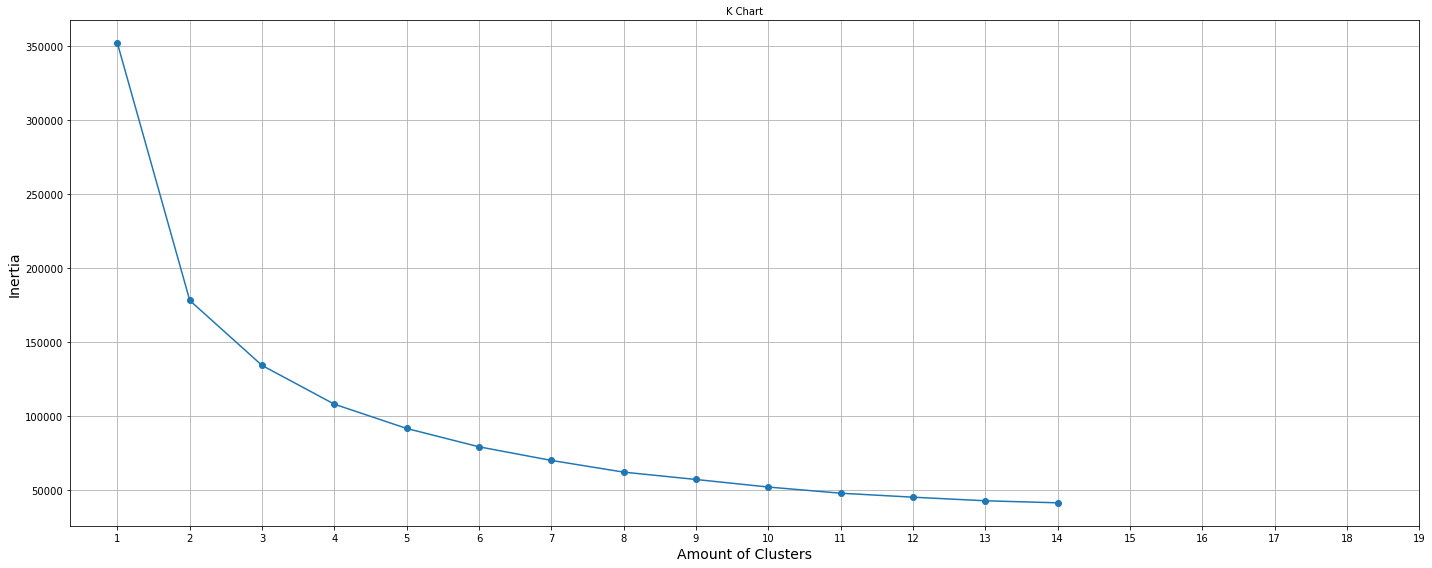

In [13]:
plt.figure(figsize=(20,8)) 
plt.title("K Chart", fontsize=10)

plt.plot(range(1,15), wcss, "-o")
plt.grid(True)

plt.xlabel("Amount of Clusters", fontsize=14) 
plt.ylabel("Inertia", fontsize=14)

plt.xticks(range(1,20))

plt.tight_layout()

plt.show()


In [14]:
kmeans =KMeans(n_clusters=3)

kmeans.fit(bodyfat)

KMeans(n_clusters=3)

In [15]:
kmeans_predict =kmeans.predict(bodyfat)

In [16]:
kmeans_predict

array([0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 2, 1, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 0,
       0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0, 2,
       0, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 2, 2, 1])

In [17]:
bodyfat["Label"]=kmeans_predict

In [18]:
bodyfat.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Label
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,0
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,0
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,2


In [19]:
bodyfat.fillna(method="ffill")

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Label
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,0
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,0
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,0
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,2
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'BodyFat')

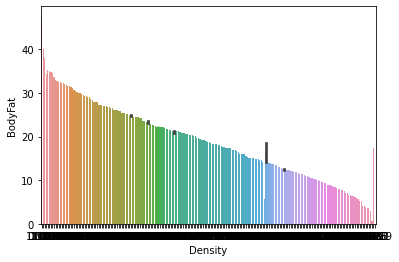

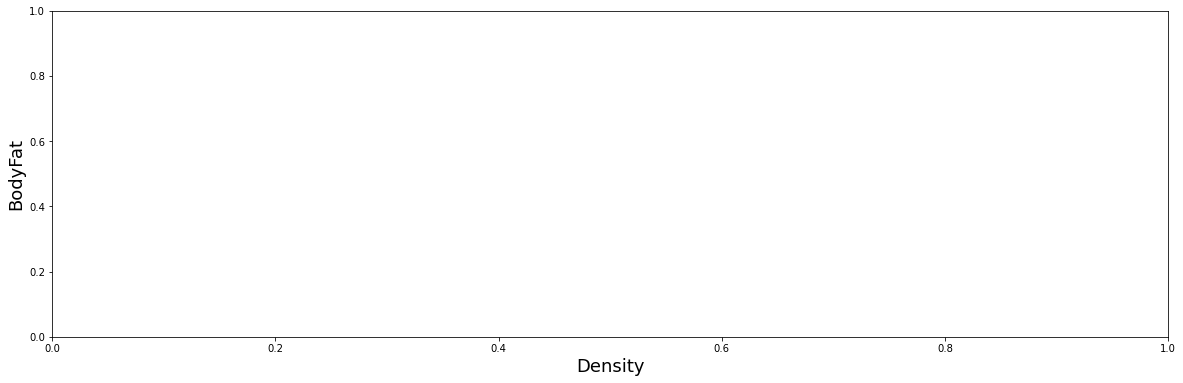

In [22]:
sns.barplot(bodyfat['Density'],bodyfat['BodyFat'])
plt.figure(figsize=(20,6)) 

plt.xlabel("Density", fontsize=18) 
plt.ylabel("BodyFat", fontsize=18)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='BodyFat'>

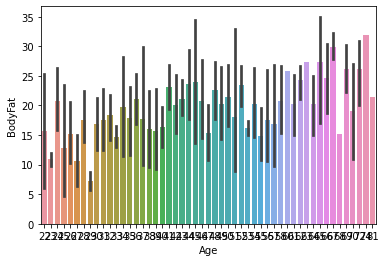

In [24]:
sns.barplot(bodyfat['Age'],bodyfat['BodyFat'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'BodyFat')

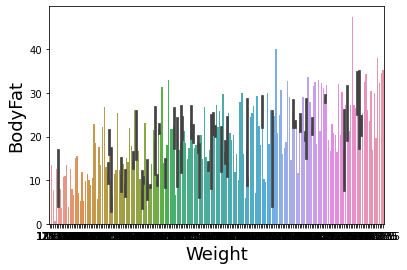

In [26]:
sns.barplot(bodyfat['Weight'],bodyfat['BodyFat'])
plt.xlabel("Weight", fontsize=18) 
plt.ylabel("BodyFat", fontsize=18)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='BodyFat'>

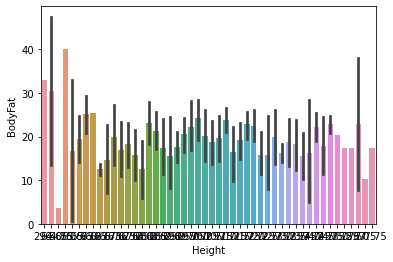

In [27]:
sns.barplot(bodyfat['Height'],bodyfat['BodyFat'])
 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Abdomen', ylabel='BodyFat'>

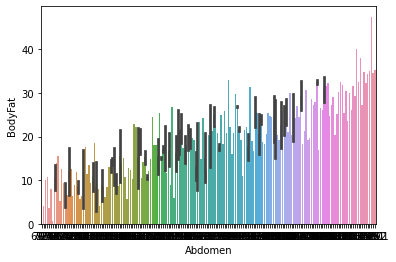

In [28]:
sns.barplot(bodyfat['Abdomen'],bodyfat['BodyFat'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hip', ylabel='BodyFat'>

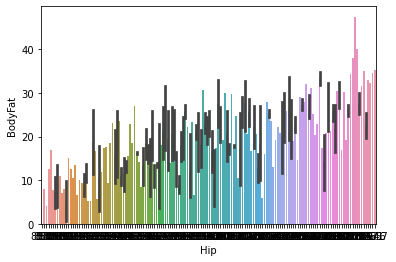

In [29]:
sns.barplot(bodyfat['Hip'],bodyfat['BodyFat'])

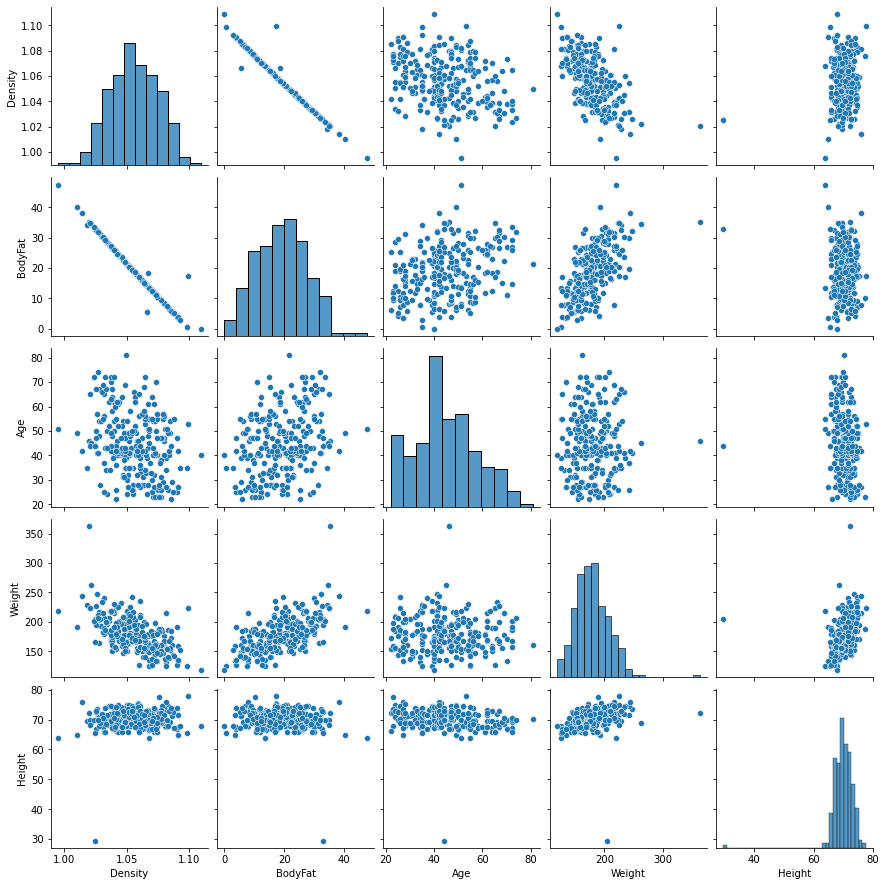

In [19]:
import seaborn as sns
sns.pairplot(bodyfat[['Density','BodyFat','Age','Weight','Height']])

In [12]:
import pandas as pd
import numpy as np
bodyfat= pd.read_csv("bodyfat.csv")

In [20]:
bodyfat.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [6]:
import pandas as pd
radius=pd.read_csv("bodyfat.csv",)
import math
circumference= 2*math.pi*radius
print("circumference of the circle is", circumference)


circumference of the circle is       Density     BodyFat         Age       Weight      Height        Neck  \
0    6.728035   77.283179  144.513262   969.181334  425.685805  227.451308   
1    6.819141   38.327430  138.230077  1088.561854  453.960138  241.902634   
2    6.543309  158.964588  138.230077   967.610537  416.261027  213.628300   
3    6.755053   65.345127  163.362818  1160.818486  453.960138  234.991130   
4    6.496814  180.327418  150.796447  1157.676893  447.676953  216.141575   
..        ...         ...         ...          ...         ...         ...   
247  6.745628   69.115038  439.822972   843.517627  420.973416  219.283167   
248  6.431468  211.115026  452.389342  1262.920247  438.252175  256.982279   
249  6.489274  184.097330  452.389342  1173.384856  414.690230  244.415908   
250  6.533884  163.362818  452.389342  1198.517597  442.964564  244.415908   
251  6.453460  200.433611  464.955713  1303.760951  439.822972  256.353961   

          Chest     Abdomen     